## Análisis descriptivo

In [ ]:
import networkx as nx
import networkx.algorithms.community as nx_comm
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import itertools

In [ ]:
edges = pd.read_csv('edges.csv')
nodes_data = pd.read_csv('nodes.csv')

In [ ]:
edges.head(5)

,source,target
0,Baron Zemo,Blackout (Marcus Daniels)
1,Baron Zemo,Vermin (comics)
2,N'astirh,S'ym
3,N'astirh,Belasco (Marvel Comics)
4,N'astirh,Madelyne Pryor


In [ ]:
nodes_data.head(5)

,group,id,size
0,1,Baron Zemo,2
1,1,N'astirh,3
2,0,Silver Sable,1
3,0,Hope Summers (comics),1
4,0,Magik (Illyana Rasputin),1


In [ ]:
g = nx.from_pandas_edgelist(df=edges, source='source',target='target')
print(g)

Graph with 350 nodes and 346 edges


In [ ]:
print('Número de nodos:', g.number_of_nodes())
print('Número de aristas:', g.number_of_edges())

#Lista de nodos
print('Nodos:', g.nodes)

#Lista de aristas
print('Aristas:', g.edges)

Número de nodos: 350
Número de aristas: 346
Nodos: ['Baron Zemo', 'Blackout (Marcus Daniels)', 'Vermin (comics)', "N'astirh", "S'ym", 'Belasco (Marvel Comics)', 'Madelyne Pryor', 'Silver Sable', 'Peregrine (comics)', 'Hope Summers (comics)', 'Cable (comics)', 'Magik (Illyana Rasputin)', 'Night Thrasher (Dwayne Taylor)', "Midnight's Fire", 'Silhouette (comics)', 'Orb (comics)', 'Justin Hammer', 'Forge (comics)', 'Storm (Marvel Comics)', 'U.S. Agent (character)', 'Battlestar (comics)', 'Venom (Marvel Comics character)', 'Carnage (comics)', 'Doctor Doom', 'Spider-Man', 'Magneto (comics)', 'Red Skull', 'Eddie Brock', 'Hercules (Marvel Comics)', 'Amadeus Cho', 'Selene (comics)', 'Senyaka', 'Eli Bard', 'Wither (comics)', 'Lois London', 'Blink (comics)', 'Hood (comics)', 'Cyclone (Marvel Comics)', 'Madame Masque', 'Sabretooth (comics)', 'Pasco (comics)', 'Beetle (comics)', 'Ringer (comics)', 'Siryn', 'Black Tom Cassidy', 'Juggernaut (comics)', 'Malekith the Accursed', 'Surtur (Marvel Comics)'

In [ ]:
nodes_attributes = nodes_data.set_index('id').to_dict('index')
nx.set_node_attributes(g, nodes_attributes)

In [ ]:
dict(g.nodes(data=True))

{'Baron Zemo': {'group': 1, 'size': 2},
 'Blackout (Marcus Daniels)': {'group': 1, 'size': 1},
 'Vermin (comics)': {'group': 1, 'size': 1},
 "N'astirh": {'group': 1, 'size': 3},
 "S'ym": {'group': 1, 'size': 2},
 'Belasco (Marvel Comics)': {'group': 1, 'size': 3},
 'Madelyne Pryor': {'group': 1, 'size': 2},
 'Silver Sable': {'group': 0, 'size': 1},
 'Peregrine (comics)': {'group': 0, 'size': 1},
 'Hope Summers (comics)': {'group': 0, 'size': 1},
 'Cable (comics)': {'group': 0, 'size': 4},
 'Magik (Illyana Rasputin)': {'group': 0, 'size': 1},
 'Night Thrasher (Dwayne Taylor)': {'group': 0, 'size': 2},
 "Midnight's Fire": {'group': 1, 'size': 1},
 'Silhouette (comics)': {'group': 0, 'size': 1},
 'Orb (comics)': {'group': 1, 'size': 1},
 'Justin Hammer': {'group': 1, 'size': 5},
 'Forge (comics)': {'group': 0, 'size': 1},
 'Storm (Marvel Comics)': {'group': 0, 'size': 2},
 'U.S. Agent (character)': {'group': 0, 'size': 1},
 'Battlestar (comics)': {'group': 0, 'size': 1},
 'Venom (Marvel C

In [ ]:
g.nodes(data=True)['Spider-Man']

{'group': 0, 'size': 12}

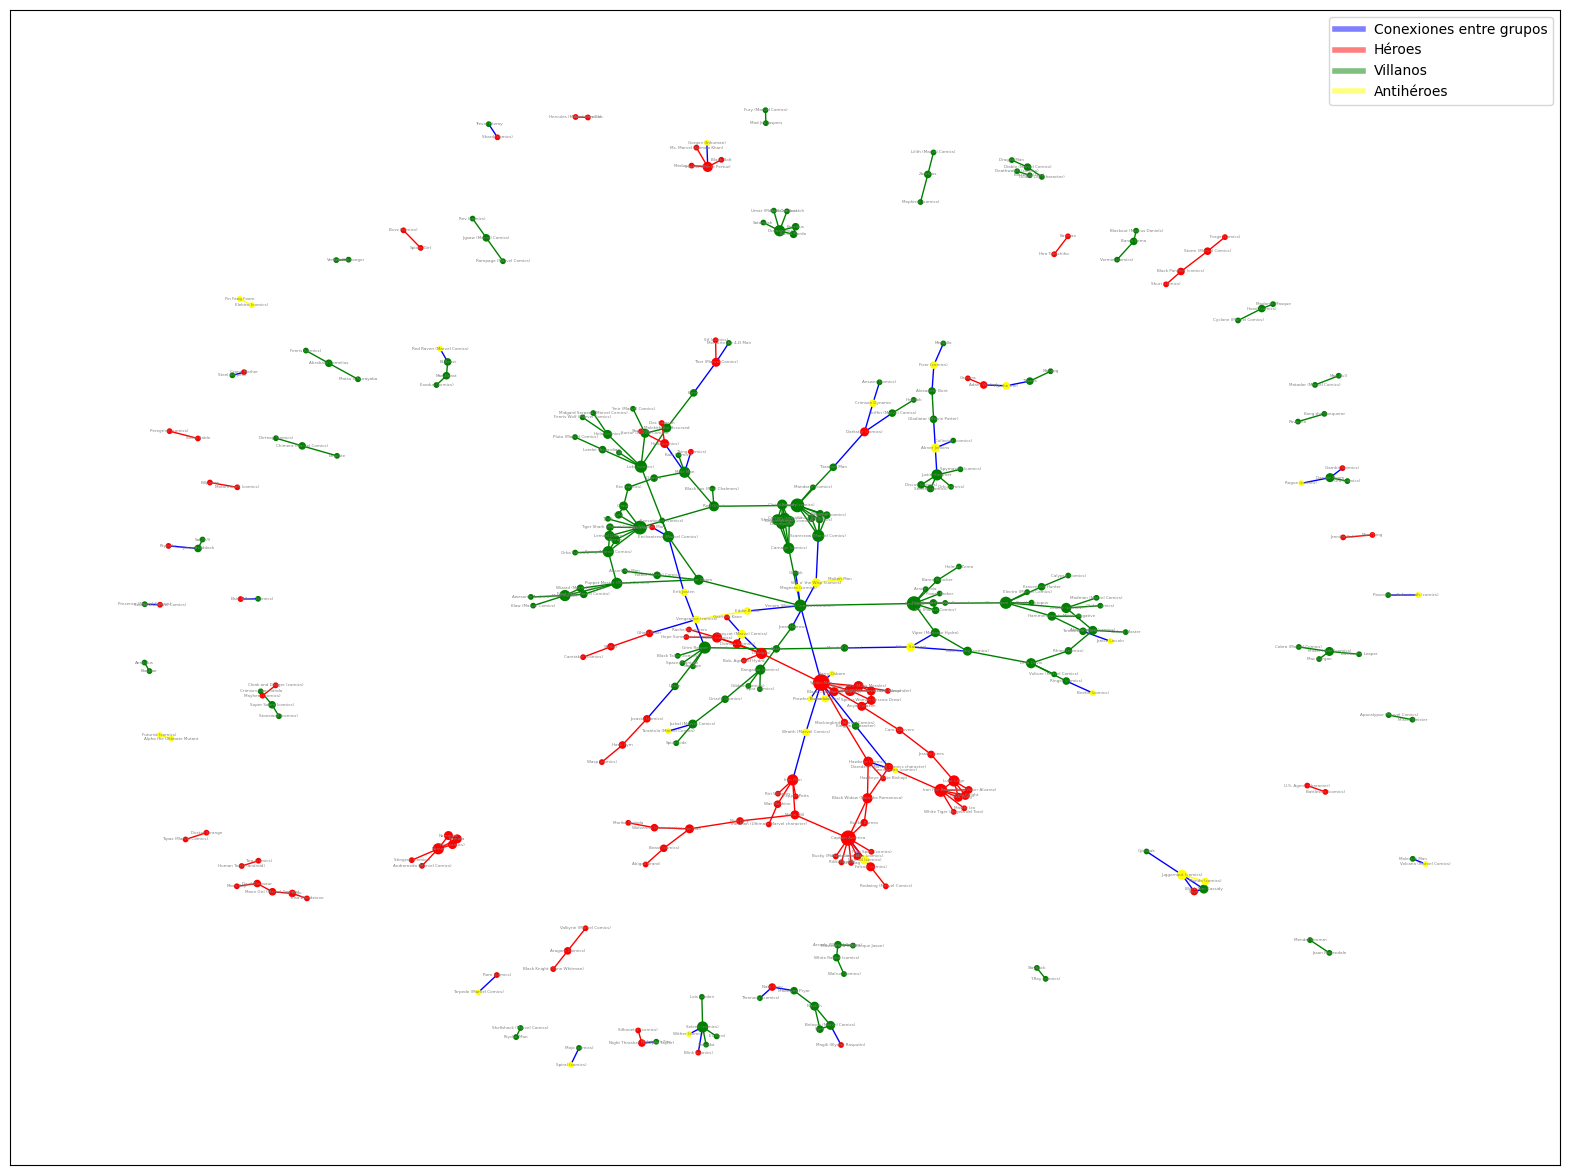

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))

# Posición de los nodos
pos = nx.spring_layout(g)

# Color de los enlaces
edge_colors = []
for u, v in g.edges():
    group_u = nx.get_node_attributes(g, 'group')[u]
    group_v = nx.get_node_attributes(g, 'group')[v]
    if group_u != group_v:
        edge_colors.append('blue')
    elif group_u == 0 :
        edge_colors.append('red')
    elif group_u == 1:
        edge_colors.append('green')
    else:
        edge_colors.append('yellow')

# Estetica de los nodos
nodes_size  = [10 * g.degree[node] for node in g.nodes()]
nodes_groups = list(nx.get_node_attributes(g, 'group').values())
nodes_colors = []
for group in nodes_groups:
  if group == 0:
    nodes_colors.append('red')
  elif group == 1:
    nodes_colors.append('green')
  else:
    nodes_colors.append('yellow')

# Leyenda
custom_lines = [Line2D([0], [0], color='blue', alpha=0.5, lw=4),
                Line2D([0], [0], color='red', alpha=0.5, lw=4),
                Line2D([0], [0], color='green', alpha=0.5, lw=4),
                Line2D([0], [0], color='yellow', alpha=0.5, lw=4)]

ax.legend(custom_lines, ['Conexiones entre grupos', 'Héroes', 'Villanos','Antihéroes'])

nx.draw_networkx_nodes(g, pos=pos, node_size=nodes_size, node_color=nodes_colors, ax=ax)
nx.draw_networkx_labels(g, pos=pos, ax=ax, font_size=3, font_color='grey')
nx.draw_networkx_edges(g, pos=pos, edgelist=g.edges,
                       edge_color=edge_colors, ax=ax);

## Deteccion de vecinos

In [ ]:
node = 'Spider-Man'
neighbors = list(nx.neighbors(g,node))
print(neighbors)

['Venom (Marvel Comics character)', 'Anya Corazon', 'Spider-Man (Miles Morales)', 'Prowler (comics)', 'Harry Osborn', 'Mockingbird (Marvel Comics)', 'Deadpool', 'Wraith (Marvel Comics)', 'Puma (comics)', 'Black Cat (Marvel Comics)', 'Kingpin (character)', 'Silk (comics)']


In [ ]:
node = 'Spider-Man'
order = 3
ego = nx.ego_graph(g, node, radius=order)
neighbors = list(ego.nodes())
print(neighbors)

['Carnage (comics)', 'Crossbones (comics)', 'Puppet Master (Marvel Comics)', 'Power Broker', 'Eddie Brock', 'Jessica Jones', 'Venom (Marvel Comics character)', 'Iron Fist (comics)', 'Hawkeye (comics)', 'Spider-Man (Miles Morales)', 'Doctor Doom', 'Maria Hill', 'War Machine', 'Deadpool', 'Doctor Faustus (comics)', 'Riri Williams', 'Arnim Zola', 'Bob, Agent of Hydra', 'Sin (Marvel Comics)', 'Harry Osborn', 'Garrison Kane', 'Prowler (comics)', 'Hawkeye (Kate Bishop)', 'Cable (comics)', 'Rachel Summers', 'Chameleon (comics)', 'Anya Corazon', 'Viper (Madame Hydra)', 'Puma (comics)', 'Black Widow (Natasha Romanova)', 'Pepper Potts', 'Domino (comics)', 'Garokk', 'Swordsman (comics)', 'Daredevil (Marvel Comics character)', 'Vengeance (comics)', 'Shriek (comics)', 'Magneto (comics)', 'Iron Man', 'Titania (Marvel Comics)', 'Doppelganger (comics)', 'Silk (comics)', 'Hope Summers (comics)', 'Spider-Woman (Gwen Stacy)', 'Spider-Woman (Jessica Drew)', 'Spider-Man', 'Black Cat (Marvel Comics)', 'Baro

# Análisis de centralidad

In [ ]:
centralidad_grado=list(nx.algorithms.degree_centrality(g).values())
centralidad_cercania=list(nx.algorithms.closeness_centrality(g).values())
centralidad_betweness=list(nx.algorithms.betweenness_centrality(g).values())
centralidad_eigenvector=list(nx.algorithms.eigenvector_centrality(g).values())
coeficientes_clustering=list(nx.algorithms.cluster.clustering(g).values())

In [ ]:
centralidad_grado

In [ ]:
cgrado = nx.algorithms.degree_centrality(g)
sorted(cgrado.items(), key= lambda elemento : elemento[1], reverse=True)

In [ ]:
ccerc = nx.algorithms.closeness_centrality(g)
sorted(ccerc.items(), key= lambda elemento : elemento[1], reverse=True)

In [ ]:
ceigen = nx.algorithms.eigenvector_centrality(g)
sorted(ceigen.items(), key= lambda elemento : elemento[1], reverse=True)

In [ ]:
cbet = nx.algorithms.betweenness_centrality(g)
sorted(cbet.items(), key= lambda elemento : elemento[1], reverse=True)

In [ ]:
cclust = nx.algorithms.cluster.clustering(g)
sorted(cclust.items(), key= lambda elemento : elemento[1], reverse=True)

# Comparación métricas de centralidad

In [ ]:
grado      = pd.Series(dict(nx.degree(g)), name='grado')
cercania    =  pd.Series(nx.closeness_centrality(g), name='cercania')
betweenness =  pd.Series(nx.betweenness_centrality(g), name='betweenness')
eigenvector =  pd.Series(nx.eigenvector_centrality(g), name='eigenvector')
clustering = pd.Series(nx.cluster.clustering(g), name = 'clustering')
centralidad = pd.concat([grado, eigenvector, cercania, betweenness, clustering], axis=1)
centralidad.index.name = 'node'
centralidad

,grado,eigenvector,cercania,betweenness,clustering
node,,,,,
Baron Zemo,2,6.528657e-31,0.005731,0.000016,0.000000
Blackout (Marcus Daniels),1,4.616458e-31,0.003820,0.000000,0.000000
Vermin (comics),1,4.616458e-31,0.003820,0.000000,0.000000
N'astirh,3,1.038081e-19,0.010315,0.000148,0.333333
S'ym,2,8.675562e-20,0.007935,0.000000,1.000000
...,...,...,...,...,...
Jack Flag,1,3.139236e-04,0.057663,0.000000,0.000000
Rikki Barnes,1,3.139236e-04,0.057663,0.000000,0.000000
Arnim Zola,1,9.069278e-03,0.081651,0.000000,0.000000


In [ ]:
for col in centralidad.columns:
    top_nodos = centralidad[col].sort_values(ascending=False).head(5).index.to_list()
    top_nodos.sort()
    print(f"Nodos con mayor {col}: {top_nodos}")

Nodos con mayor grado: ['Attuma', 'Captain America', 'Red Skull', 'Spider-Man', 'Unicorn (comics)']
Nodos con mayor eigenvector: ['Carnage (comics)', 'Carrion (comics)', 'Demogoblin', 'Doppelganger (comics)', 'Shriek (comics)']
Nodos con mayor cercania: ['Doctor Doom', 'Puppet Master (Marvel Comics)', 'Red Skull', 'Spider-Man', 'Venom (Marvel Comics character)']
Nodos con mayor betweenness: ['Doctor Doom', 'Krang (Marvel Comics)', 'Puppet Master (Marvel Comics)', 'Spider-Man', 'Venom (Marvel Comics character)']
Nodos con mayor clustering: ['Colleen Wing', 'Crossbones (comics)', 'Discus (comics)', 'Sin (Marvel Comics)', 'Siryn']


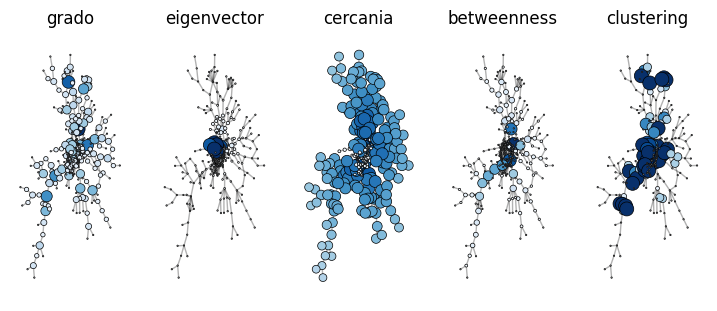

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(9, 3.5))

# Posición de los nodos
pos = nx.kamada_kawai_layout(g)

# Mapa de colores
cmap =  mpl.colormaps['Blues']

# Escalado de las métricas para pooder compararlas
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(centralidad)
centralidad_scaled = pd.DataFrame(
                        scaler.transform(centralidad),
                        columns=scaler.feature_names_in_
                    )
centralidad_scaled.head(3)

for i, metrica in enumerate(centralidad_scaled.columns):
    node_size = 100 * centralidad_scaled[metrica] + 1
    node_color = cmap(centralidad_scaled[metrica])
    nx.draw_networkx_nodes(
        g,
        pos=pos,
        node_size=node_size,
        node_color=node_color,
        linewidths=0.5,
        edgecolors='black',
        ax=axs[i]
    )
    nx.draw_networkx_edges(g, pos=pos, edgelist=g.edges, alpha=0.3, ax=axs[i])
    axs[i].set_title(metrica)
    axs[i].axis('off')

In [ ]:
clf=tree.DecisionTreeClassifier(max_depth=3)
X=list([x,y] for x,y in zip(centralidad_grado, centralidad_cercania))
y=list(nx.get_node_attributes(g,"group").values())
X_train, X_test, y_train, y_test = train_test_split(X,y) #coge algunos ejemplos al azar de X e y
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

Rendimiento del modelo sobre el conjunto de entrenamiento: 0.6145038167938931
Rendimiento del modelo sobre el conjunto de test: 0.4772727272727273
Rendimiento del modelo sobre el conjunto total: 0.58


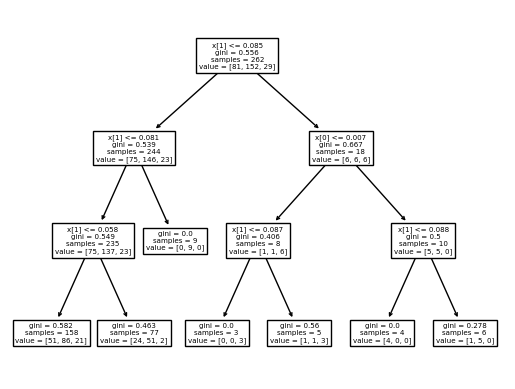

In [ ]:
tree.plot_tree(clf)
print('Rendimiento del modelo sobre el conjunto de entrenamiento:', clf.score(X_train,y_train))
print('Rendimiento del modelo sobre el conjunto de test:', clf.score(X_test,y_test))
print('Rendimiento del modelo sobre el conjunto total:', clf.score(X,y))
plt.show()

In [ ]:
clf.predict([X_test[27]])

array([1])

In [ ]:
y_test[27]

0

In [ ]:
clf.score(X_test,y_test)

0.4772727272727273

In [ ]:
clf1=tree.DecisionTreeClassifier(max_depth=3)
X1=list([x,y] for x,y in zip(centralidad_betweness, centralidad_eigenvector))
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y)
clf1.fit(X1_train,y1_train)

DecisionTreeClassifier(max_depth=3)

Rendimiento del modelo sobre el conjunto de entrenamiento: 0.5610687022900763
Rendimiento del modelo sobre el conjunto de test: 0.625
Rendimiento del modelo sobre el conjunto total: 0.5771428571428572


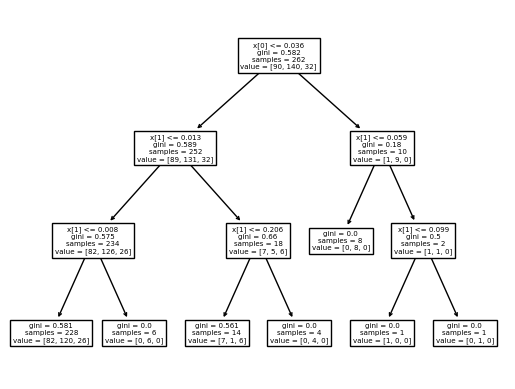

In [ ]:
tree.plot_tree(clf1)
print('Rendimiento del modelo sobre el conjunto de entrenamiento:', clf1.score(X1_train,y1_train))
print('Rendimiento del modelo sobre el conjunto de test:', clf1.score(X1_test,y1_test))
print('Rendimiento del modelo sobre el conjunto total:', clf1.score(X1,y))
plt.show()

In [ ]:
clf2=tree.DecisionTreeClassifier(max_depth=3)
X2=list([x,y] for x,y in zip(centralidad_eigenvector, coeficientes_clustering))
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y)
clf2.fit(X2_train,y2_train)

DecisionTreeClassifier(max_depth=3)

Rendimiento del modelo sobre el conjunto de entrenamiento: 0.6259541984732825
Rendimiento del modelo sobre el conjunto de test: 0.45454545454545453
Rendimiento del modelo sobre el conjunto total: 0.5828571428571429


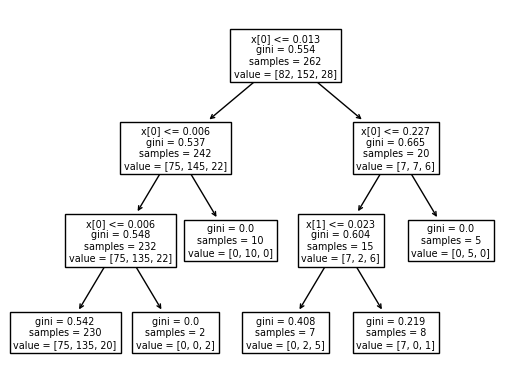

In [ ]:
tree.plot_tree(clf2)
print('Rendimiento del modelo sobre el conjunto de entrenamiento:', clf2.score(X2_train,y2_train))
print('Rendimiento del modelo sobre el conjunto de test:', clf2.score(X2_test,y2_test))
print('Rendimiento del modelo sobre el conjunto total:', clf2.score(X2,y))
plt.show()

In [ ]:
clf3=tree.DecisionTreeClassifier(max_depth=3)
X3=list([x,y] for x,y in zip(centralidad_grado, coeficientes_clustering))
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y) #coge algunos ejemplos al azar de X e y
clf3.fit(X3_train,y3_train)

DecisionTreeClassifier(max_depth=3)

El rendimiento de este modelo es de:  0.5681818181818182


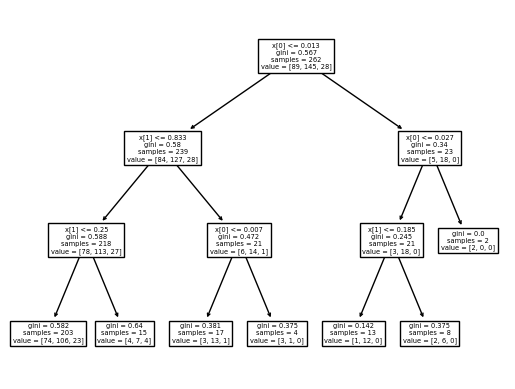

In [ ]:
tree.plot_tree(clf3)
print('El rendimiento de este modelo es de: ', clf3.score(X3_test,y3_test))
plt.show()

In [ ]:
clftotal=tree.DecisionTreeClassifier(max_depth=3)
Xtotal=list([x,y,z,w,q] for x,y,z,w,q in zip(centralidad_grado, centralidad_cercania, centralidad_betweness, centralidad_eigenvector, coeficientes_clustering))
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xtotal,y) #coge algunos ejemplos al azar de X e y
clftotal.fit(Xt_train,yt_train)

DecisionTreeClassifier(max_depth=3)

El rendimiento de este modelo es de:  0.5795454545454546


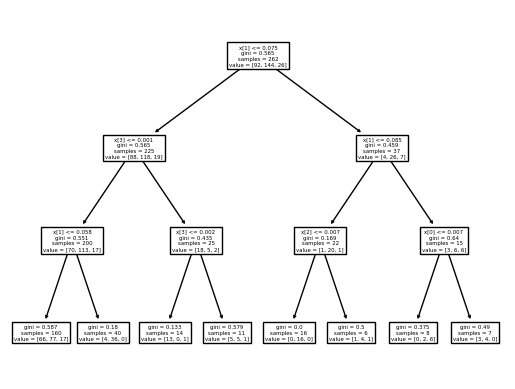

In [ ]:
tree.plot_tree(clftotal)
print('El rendimiento de este modelo es de: ', clftotal.score(Xt_test,yt_test))
plt.show()

# Componente conexa

In [ ]:
[len(c) for c in sorted(nx.connected_components(g), key=len, reverse=True)]

In [ ]:
mayorcc = max(nx.connected_components(g), key=len)
g_mayorcc = g.subgraph(mayorcc).copy()
print(g_mayorcc)

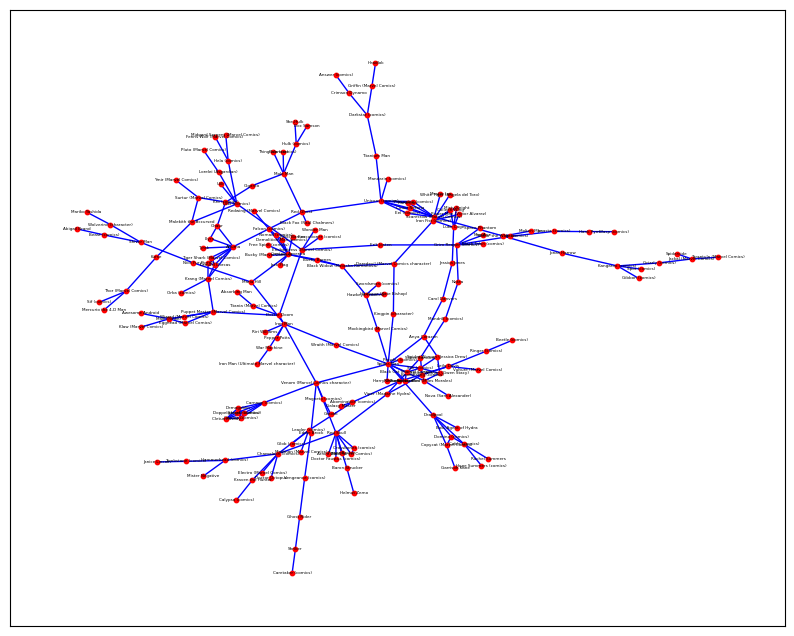

In [ ]:
plt.figure(figsize=(10,8))
pos = nx.spring_layout(g_mayorcc)
nx.draw_networkx_nodes(g_mayorcc, pos=pos, node_size=10, node_color='red')
nx.draw_networkx_labels(g_mayorcc, pos=pos, font_size=3)
nx.draw_networkx_edges(g_mayorcc, pos=pos, edge_color='blue')

# Detección de comunidades

## Algoritmo de Girvan-Newman

In [ ]:
communities_generator = nx_comm.girvan_newman(g, most_valuable_edge=None)

In [ ]:
communities = next(communities_generator)
communities

In [ ]:


node_colors = []
for node in g:
    if node in communities[0]:
        node_colors.append('red')
    elif node in communities[1]:
        node_colors.append('blue')
    elif node in communities[2]:
        node_colors.append('pink')
    elif node in communities[3]:
        node_colors.append('yellow')
    elif node in communities[4]:
        node_colors.append('orange')
    elif node in communities[5]:
        node_colors.append('black')
    elif node in communities[6]:
        node_colors.append('purple')
    elif node in communities[7]:
        node_colors.append('brown')
    elif node in communities[8]:
        node_colors.append('violet')
    else:
        node_colors.append('green')

fig, ax = plt.subplots(figsize=(8, 5))
nx.draw(g, node_color=node_colors, node_size=10, with_labels=False, ax=ax)
plt.show()